# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–æ–∑—Ä–∞—Å—Ç–∞ –ø–æ–∫—É–ø–∞—Ç–µ–ª–µ–π

## –ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

In [2]:
import pandas as pd 
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense,Conv2D, Flatten, Dense,MaxPooling2D,AveragePooling2D,AvgPool2D
from tensorflow.keras.models import Sequential
from tensorflow import keras 
from keras.datasets import fashion_mnist 
from keras.preprocessing.image import ImageDataGenerator 
import numpy as np 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet import ResNet50

Found 7591 validated image filenames.


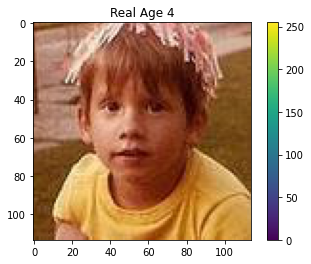

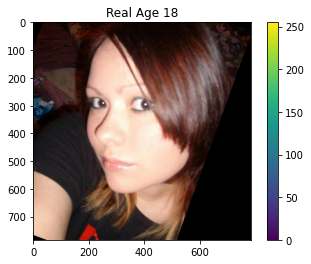

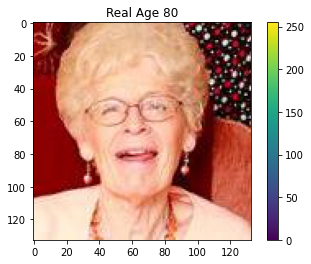

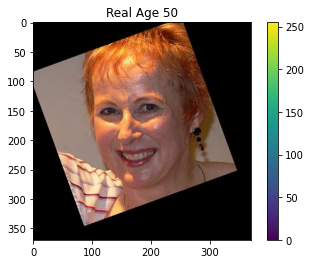

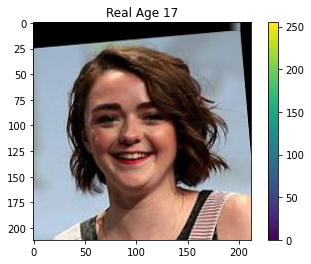

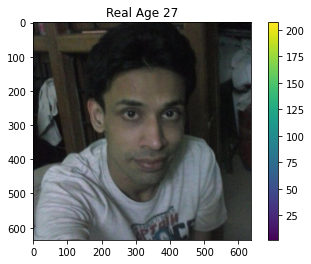

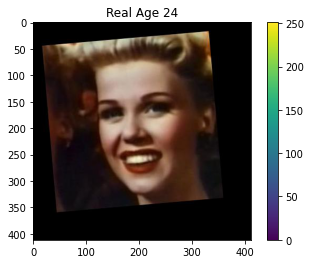

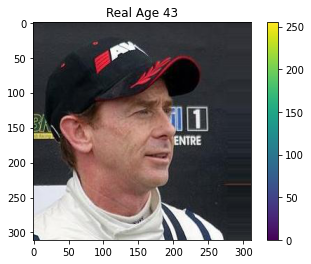

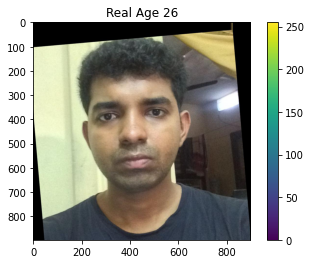

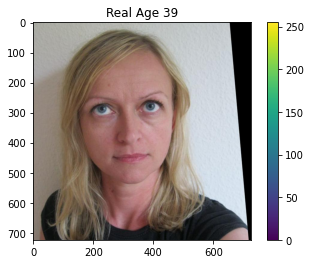

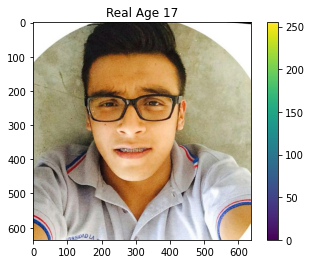

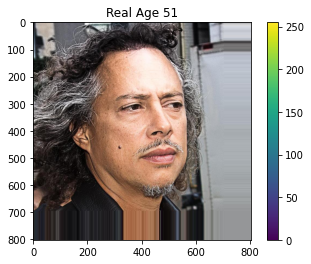

In [3]:
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

for i,k in zip(labels.file_name[:15],labels.real_age[:12]):
    image = Image.open('/datasets/faces/final_files/'+i)
    array = np.array(image)
    plt.imshow(array)
    plt.title('Real Age {:.0f}'.format(k))
    plt.colorbar()
    plt.show()

file_name  real_age
0     000000.jpg         4
1     000001.jpg        18
2     000002.jpg        80
3     000003.jpg        50
4     000004.jpg        17
...          ...       ...
7586  007608.jpg        14
7587  007609.jpg        37
7588  007610.jpg        28
7589  007611.jpg        20
7590  007612.jpg        47

[7591 rows x 2 columns]

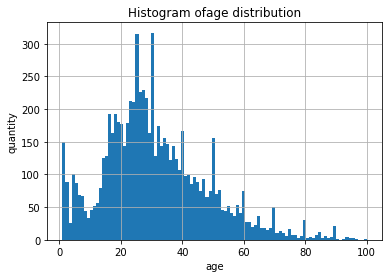

In [4]:
labels.shape

labels.hist(bins = 100)

plt.title('Histogram ofage distribution')
plt.xlabel('age')
plt.ylabel('quantity')

labels

Text(0.5, 1.0, 'Boxplot of age distribution')

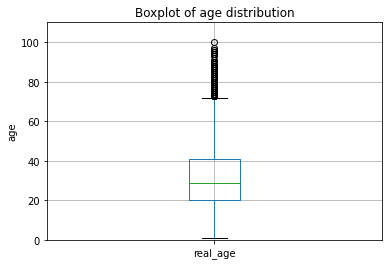

In [8]:
labels.boxplot()
plt.ylim(0, 110)
plt.ylabel('age')
plt.title('Boxplot of age distribution')

Text(0.5, 1.0, 'Boxplot of age distribution')

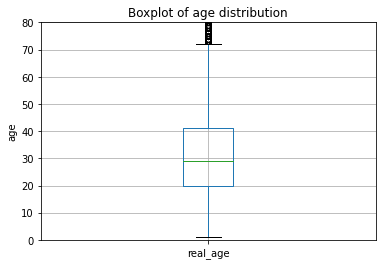

In [10]:
labels.boxplot()
plt.ylim(0, 80)
plt.ylabel('age')
plt.title('Boxplot of age distribution')


    
–ò—Å—Ö–æ–¥—è –∏–∑ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥,—á—Ç–æ –∫–æ–ª-–≤–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –ø–æ—Å–ª–µ–¥—É—é—â–µ–≥–æ –æ–±—É—á–µ–Ω–∏—è —Ö–≤–∞—Ç–∞—Ç,–ø–æ  –≥—Ä–∞—Ñ–∏–∫–∞–º –º–æ–¥–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥,—á—Ç–æ –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏–π —Å –≤–æ–∑—Ä–∞—Å—Ç–æ–º ~ 20 - 35 –ª–µ—Ç,–º–µ–¥–∏–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –Ω–∞ —É—Ä–æ–≤–Ω–µ 29 –ª–µ—Ç, —Ö–≤–æ—Å—Ç—ã –∂–µ –Ω–∞—á–∏–Ω–∞—é—Ç —Ç—è–Ω—É—Ç—å—Å—è –æ—Ç  ~  72 –∏ –∑–∞–∫–∞–Ω—á–∏–≤–∞—é—Ç—Å—è –Ω–∞ –≤–æ–∑—Ä–∞—Å—Ç–µ 100 (–µ—Å—Ç—å –¥–æ–ª–≥–æ–∂–∏—Ç–µ–ª–∏, –∏ —ç—Ç–æ —á–µ–Ω—å –∫—Ä—É—Ç–æ —Ö–æ—Ä–æ—à–æ,–∫–∞–∫ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è —Ç–∞–∫ –∏ –¥–ª—è —á–µ–ª–æ–≤–µ—á–µ—Å–≤—Ç–∞ –≤ —Ü–µ–ª–æ–º üòÅ)
–†–∞—Å—Å–º–æ—Ç—Ä–µ–≤ –Ω–µ–∫–æ—Ç—Ä—ã–µ —Ñ–æ—Ç–æ,—è —É–≤–∏–¥–µ–ª, —á—Ç–æ –≤—Å–µ –æ–Ω–∏ –≤ —Ä–∞–∑–Ω–æ–º –∫–∞—á–µ—Å—Ç–≤–µ,–µ—Å—Ç—å —Ñ–æ—Ç–æ —Å –¥–æ–ø —Ñ–∏—á–∞–º–∏,–Ω–∞–ø—Ä–∏–º–µ—Ä —Å —Ñ–ª–∏–ø–∞–º–∏ –∏ —Å–º–µ—â–Ω–∏–µ–º,—á—Ç–æ —Ö–æ—Ä–æ—à–æ —Å–∫–∞–∂–µ—Ç—Å—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏, –¥–∞–∂–µ –±–µ–∑ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö "—É–ª—É—á—à–∞–ª–æ–∫".
–ê—É–≥–º–µ–Ω—Ç–∞—Ü–∏—é,–∫–∞–∫ –º–Ω–µ –∫–∞–∂–µ—Ç—Å—è, —Å—Ç–æ–∏—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å,–¥–ª—è —É–≤–µ–ª–∏—á–µ–Ω–∏—è –≤—ã–±–æ—Ä–∫–∏ –∏ —É–ª—É—á—à–µ–Ω–∏—è –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π.


## –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏

–ü–µ—Ä–µ–Ω–µ—Å–∏—Ç–µ —Å—é–¥–∞ –∫–æ–¥ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ –∏ –µ—ë —Ä–µ–∑—É–ª—å—Ç–∞—Ç –≤—ã–≤–æ–¥–∞ –Ω–∞ —ç–∫—Ä–∞–Ω.


(–ö–æ–¥ –≤ —ç—Ç–æ–º —Ä–∞–∑–¥–µ–ª–µ –∑–∞–ø—É—Å–∫–∞–µ—Ç—Å—è –≤ –æ—Ç–¥–µ–ª—å–Ω–æ–º GPU-—Ç—Ä–µ–Ω–∞–∂—ë—Ä–µ, –ø–æ—ç—Ç–æ–º—É –æ—Ñ–æ—Ä–º–ª–µ–Ω –Ω–µ –∫–∞–∫ —è—á–µ–π–∫–∞ —Å –∫–æ–¥–æ–º, –∞ –∫–∞–∫ –∫–æ–¥ –≤ —Ç–µ–∫—Å—Ç–æ–≤–æ–π —è—á–µ–π–∫–µ)

In [4]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D,MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
import numpy as np
import pandas as pd



def load_test(path):
    labels = pd.read_csv(path+'labels.csv') 
    test_datagen = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.25)
    test_datagen_flow = test_datagen.flow_from_dataframe(dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=12345) 
    return test_datagen_flow


def load_train(path):
    labels = pd.read_csv(path+'labels.csv') 
    train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.25,
                                   horizontal_flip=True,
                                   brightness_range=(0.8, 1.))

    train_datagen_flow = train_datagen.flow_from_dataframe(dataframe=labels,
      directory=path + 'final_files/',
      x_col='file_name',
      y_col='real_age',
      target_size=(224, 224),
      batch_size=32,
      class_mode='raw',
      subset='training',
      seed=12345)
    return train_datagen_flow


def create_model(input_shape):

    backbone = ResNet50(input_shape=input_shape,
                    weights='imagenet', 
                    include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D()) 
    model.add(Dense(1, activation='relu')) 
    optimizer = Adam(lr=0.0003)
    model.compile(optimizer=optimizer,loss='mean_squared_error',metrics=['mae'])

    return model

def train_model(model, train_data, test_data, batch_size=None, epochs=10,
               steps_per_epoch=None, validation_steps=None):

    model.fit(train_data, 
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model

```

# <Epoch 1/10
178/178 - 64s - loss: 196.0765 - mae: 10.3053 - val_loss: 546.3193 - val_mae: 18.3155
Epoch 2/10
178/178 - 50s - loss: 90.4878 - mae: 7.2067 - val_loss: 669.7983 - val_mae: 20.8952
Epoch 3/10
178/178 - 48s - loss: 70.4075 - mae: 6.3395 - val_loss: 291.2863 - val_mae: 12.8226
Epoch 4/10
178/178 - 48s - loss: 50.7634 - mae: 5.4033 - val_loss: 147.9319 - val_mae: 9.1307
Epoch 5/10
178/178 - 57s - loss: 39.3176 - mae: 4.7694 - val_loss: 86.1309 - val_mae: 6.8961
Epoch 6/10
178/178 - 60s - loss: 34.7446 - mae: 4.5291 - val_loss: 130.5111 - val_mae: 8.9806
Epoch 7/10
178/178 - 61s - loss: 27.2634 - mae: 4.0290 - val_loss: 76.8531 - val_mae: 6.5797
Epoch 8/10
178/178 - 62s - loss: 24.0127 - mae: 3.7546 - val_loss: 72.4890 - val_mae: 6.4504
Epoch 9/10
178/178 - 59s - loss: 19.6485 - mae: 3.4067 - val_loss: 82.2127 - val_mae: 6.9919
Epoch 10/10
178/178 - 62s - loss: 17.0289 - mae: 3.1224 - val_loss: 65.1238 - val_mae: 5.9504>
```

## –ê–Ω–∞–ª–∏–∑ –æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏

    –í –¥–∞–Ω–Ω–æ–º –ø—Ä–æ–µ–∫—Ç–µ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–ª—Å—è –¥–∞—Ç–∞—Å–µ—Ç –∏–∑ —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏–π –≤ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ 7591 —à—Ç—É–∫,—Å –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º –∏ –±–æ–ª—å—à–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –ª—é–¥–µ–π —Å –≤–æ–∑—Ä–∞—Å—Ç–æ–º –æ—Ç 20 –¥–æ 30 –ª–µ—Ç.–î–ª—è —É–ª—É—á—à–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫–∏ –±—ã–ª –ø–æ–¥–æ–±—Ä–∞–Ω  –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–π Adam,–∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω—ã —Ñ–ª–∏–ø—ã –∏ –∏–∑–º–µ–Ω–µ–Ω–∏—è —è—Ä–∫–æ—Å—Ç–∏ –¥–ª—è —É–ª—É—É—á—à–µ–Ω–∏—è –æ–±—É—á–∞–µ–µ–º–æ—Å—Ç–∏.–ü–û—Å—Ç–∞–≤–ª–µ–Ω–Ω—É—é –∑–∞–¥–∞—á—É —Å –º–µ—Ç—Ä–∏–∫–æ–π –Ω–∏–∂–µ 8 - –≤—ã–ø–æ–ª–Ω–∏–∏–ª,—Ö–æ—Ç—è –º–æ–∂–Ω–æ –±—ã–ª–æ –±—ã —Å–¥–µ–ª–∞—Ç—å –∞–ª–≥–æ—Ä–∏—Ç–º —Ä–∞–±–æ—Ç–∞—é—â–∏–π –±—ã—Å—Ç—Ä–µ–µ,–Ω–æ –ø—Ä–æ –≤—Ä–µ–º—è –Ω–∏—á–µ–≥–æ –Ω–µ –±—ã–ª–æ —Å–∫–∞–∑–∞–Ω–æ.   

## –ß–µ–∫-–ª–∏—Å—Ç

- [x]  Jupyter Notebook –æ—Ç–∫—Ä—ã—Ç
- [ ]  –í–µ—Å—å –∫–æ–¥ –≤—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è –±–µ–∑ –æ—à–∏–±–æ–∫
- [ ]  –Ø—á–µ–π–∫–∏ —Å –∫–æ–¥–æ–º —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω—ã –≤ –ø–æ—Ä—è–¥–∫–µ –∏—Å–ø–æ–ª–Ω–µ–Ω–∏—è
- [ ]  –ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö –≤—ã–ø–æ–ª–Ω–µ–Ω
- [ ]  –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ –¥–∞–Ω–Ω—ã—Ö –ø–µ—Ä–µ–Ω–µ—Å–µ–Ω—ã –≤ —Ñ–∏–Ω–∞–ª—å–Ω—É—é —Ç–µ—Ç—Ä–∞–¥—å
- [ ]  MAE –º–æ–¥–µ–ª–∏ –Ω–µ –±–æ–ª—å—à–µ 8
- [ ]  –ö–æ–¥ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ —Å–∫–æ–ø–∏—Ä–æ–≤–∞–Ω –≤ —Ñ–∏–Ω–∞–ª—å–Ω—É—é —Ç–µ—Ç—Ä–∞–¥—å
- [ ]  –†–µ–∑—É–ª—å—Ç–∞—Ç –≤—ã–≤–æ–¥–∞ –º–æ–¥–µ–ª–∏ –Ω–∞ —ç–∫—Ä–∞–Ω –ø–µ—Ä–µ–Ω–µ—Å—ë–Ω –≤ —Ñ–∏–Ω–∞–ª—å–Ω—É—é —Ç–µ—Ç—Ä–∞–¥—å
- [ ]  –ü–æ –∏—Ç–æ–≥–∞–º –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ —Å–¥–µ–ª–∞–Ω—ã –≤—ã–≤–æ–¥—ã